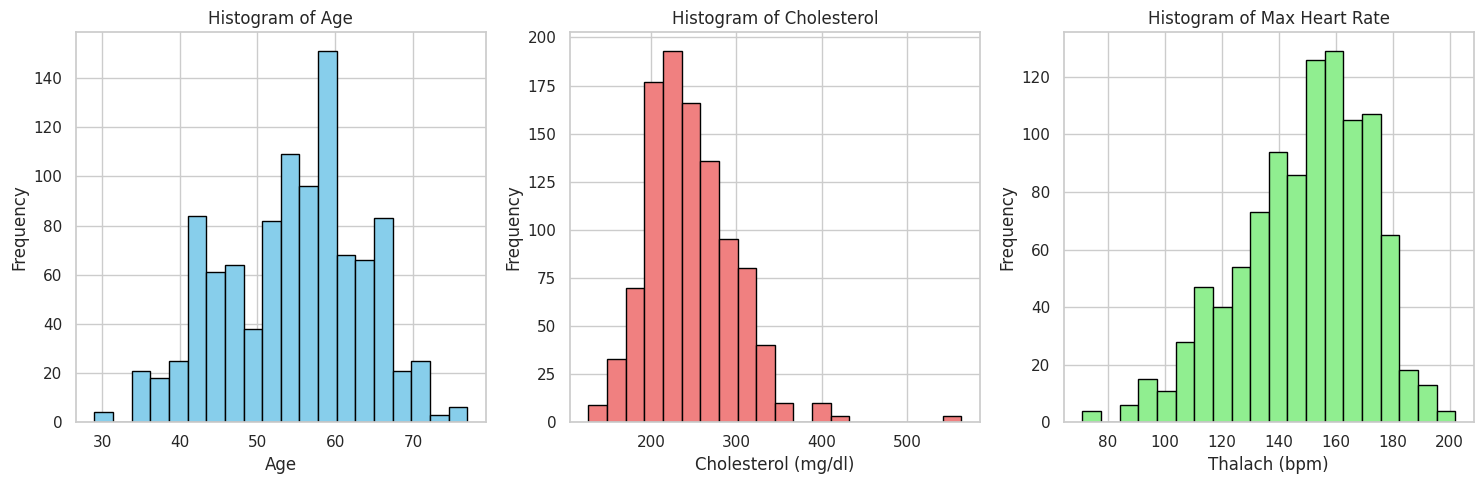

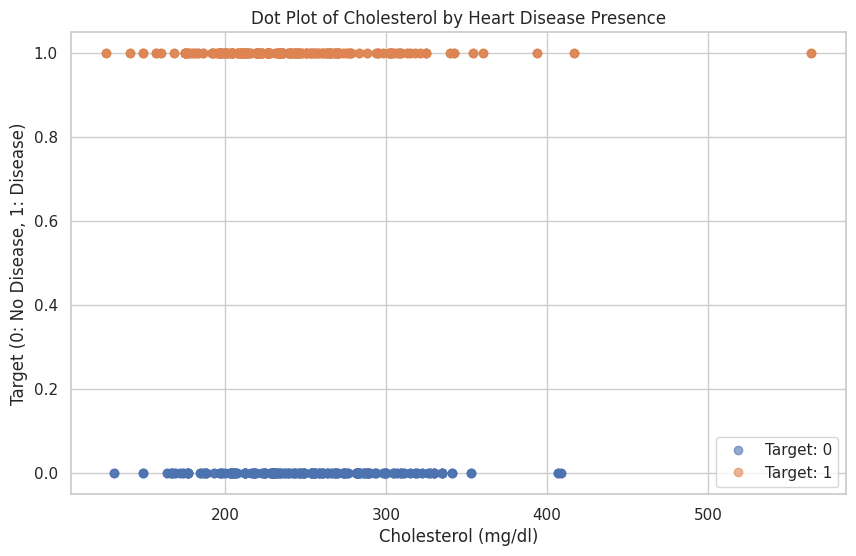

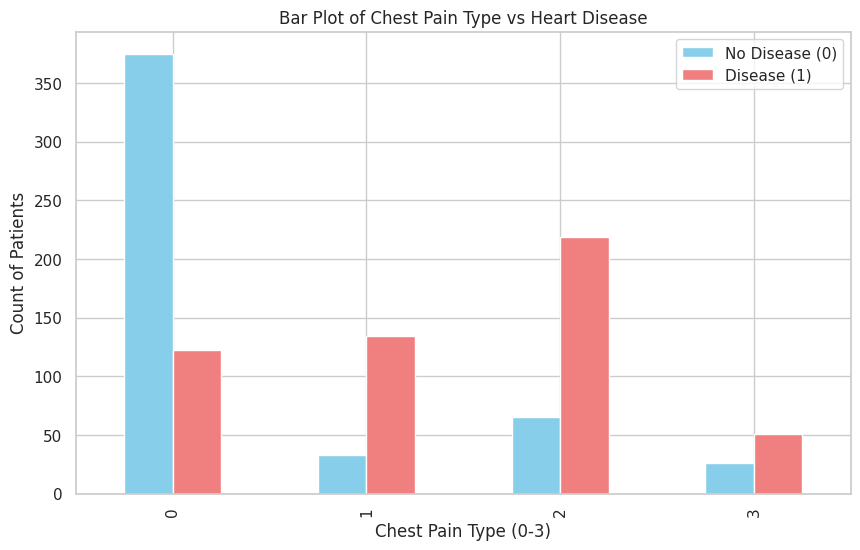

<ipython-input-2-641ad1dad3f7>:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_chol_by_age = df.groupby(age_bins)['chol'].mean()


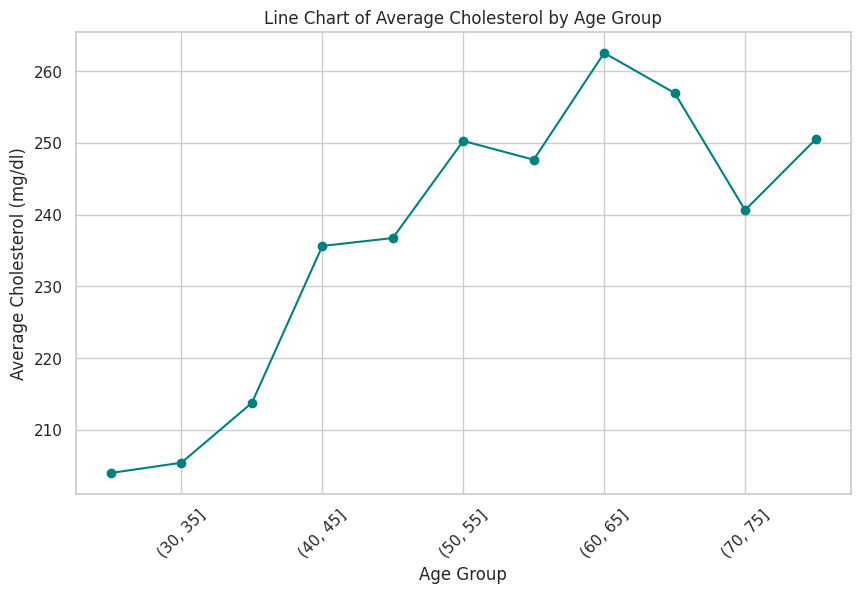

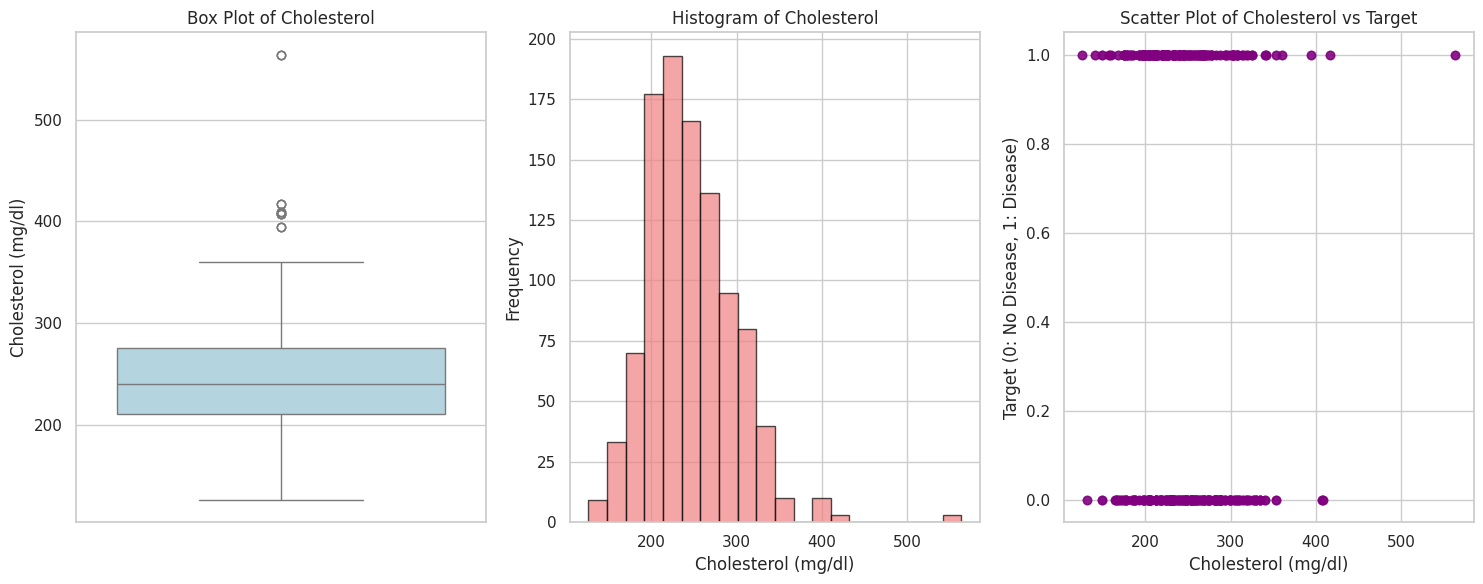

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('heart.csv')

# Set the seaborn style using sns.set()
sns.set(style="whitegrid")

# a. Histograms
# Objective: To show the distribution of continuous variables like age, cholesterol, and thalach
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['chol'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Cholesterol')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['thalach'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Max Heart Rate')
plt.xlabel('Thalach (bpm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# b. Dot Plots
# Objective: To show individual data points for cholesterol levels by target (heart disease presence)
plt.figure(figsize=(10, 6))
for target_val in df['target'].unique():
    subset = df[df['target'] == target_val]
    plt.plot(subset['chol'], [target_val] * len(subset), 'o',
             label=f'Target: {target_val}', alpha=0.6)
plt.title('Dot Plot of Cholesterol by Heart Disease Presence')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Target (0: No Disease, 1: Disease)')
plt.legend()
plt.show()

# c. Bar Plots
# Objective: To show the count of patients by chest pain type (cp) and their heart disease status
cp_counts = df.groupby(['cp', 'target']).size().unstack()
cp_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Bar Plot of Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count of Patients')
plt.legend(['No Disease (0)', 'Disease (1)'])
plt.show()

# d. Line Charts
# Objective: To show the trend of average cholesterol levels across age groups
age_bins = pd.cut(df['age'], bins=range(20, 90, 5))
avg_chol_by_age = df.groupby(age_bins)['chol'].mean()
plt.figure(figsize=(10, 6))
avg_chol_by_age.plot(kind='line', marker='o', color='teal')
plt.title('Line Chart of Average Cholesterol by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol (mg/dl)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# e. Box Plot with Histogram and Scatter Plot
# Objective: To show the distribution of cholesterol levels with additional context
plt.figure(figsize=(15, 6))

# Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(y=df['chol'], color='lightblue')
plt.title('Box Plot of Cholesterol')
plt.ylabel('Cholesterol (mg/dl)')

# Histogram on top of Box Plot
plt.subplot(1, 3, 2)
plt.hist(df['chol'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Histogram of Cholesterol')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')

# Scatter Plot on top of Box Plot
plt.subplot(1, 3, 3)
plt.scatter(df['chol'], df['target'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Cholesterol vs Target')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Target (0: No Disease, 1: Disease)')
plt.tight_layout()
plt.show()